In [1]:
%matplotlib notebook

# Notes on learning NLTK
###### Last Updated: {{ page.last_update | date: "%A, %B %d, %Y" }}

This notebook is a collection of notes and codes developed during my studies of the NLTK library.

In this notebook I will follow the [Natural Language Processing with Python](http://www.nltk.org/book/) book, focusing exclusively on the NLTK argument, skipping all the Python related parts of the book. **This is NOT a replacement for reading the book and walk the path yourself!**

## Index
* [Setting Up The Environment](#Setting-Up-The-Environment)
* [NLTK Corpora](#NLTK-Corpora)
    * [Book Corpus](#Book-Corpus)
* [Glossary](#Glossary)
* [NL Concepts](#NL-Concepts)
    * [Concordance](#Concordance)
    * [Distributional Similarity](#Distributional-Similarity)
    * [Common Contexts](#Common-Contexts)
    * [Dispersion Plot](#Dispersion-Plot)
    * [Lexical Diversity](#Lexical-Diversity)
    * [Frequency Distribution](#Frequency-Distribution)
* [Usage Examples](#Usage-Examples)
    * [Counting Vocabulary](#Counting-Vocabulary)

-------------------------------------------------------------------------------
## Setting Up the Environment
NLTK stands for **Natural Language Toolkit** and it is the most used Python library used to work with human language. More information about it can be found on the website [www.nltk.org](www.nltk.org).

At the moment of writing, the following is installed system-wide:

```
C:\nltk>python
Python 3.7.0 (v3.7.0:1bf9cc5093, Jun 27 2018, 04:06:47) [MSC v.1914 32 bit (Intel)] on win32
Type "help", "copyright", "credits" or "license" for more information.

C:\notebooks>pip list
Package            Version
------------------ -------
backcall           0.1.0
bleach             3.0.2
colorama           0.4.0
decorator          4.3.0
defusedxml         0.5.0
entrypoints        0.2.3
ipykernel          5.1.0
ipython            7.1.1
ipython-genutils   0.2.0
ipywidgets         7.4.2
jedi               0.13.1
Jinja2             2.10
jsonschema         2.6.0
jupyter            1.0.0
jupyter-client     5.2.3
jupyter-console    6.0.0
jupyter-core       4.4.0
MarkupSafe         1.0
mistune            0.8.4
nbconvert          5.4.0
nbformat           4.4.0
notebook           5.7.0
pandocfilters      1.4.2
parso              0.3.1
pickleshare        0.7.5
pip                18.1
prometheus-client  0.4.2
prompt-toolkit     2.0.7
Pygments           2.2.0
python-dateutil    2.7.5
pywinpty           0.5.4
pyzmq              17.1.2
qtconsole          4.4.2
Send2Trash         1.5.0
setuptools         40.5.0
six                1.11.0
terminado          0.8.1
testpath           0.4.2
tornado            5.1.1
traitlets          4.3.2
virtualenv         16.0.0
wcwidth            0.1.7
webencodings       0.5.1
widgetsnbextension 3.4.2
```

The first thing to do in order to work with NLTK is to install it. Detailed instructions are available on the [Installing NLTK](http://www.nltk.org/install.html) page. In this section, I will detail what I installed on my Windows system. Should I ever install it on another system, I will integrate it.


### Install Numpy
[NumPy](http://www.numpy.org/) is the fundamental package for scientific computing with Python. Install it on your system with the following command

```
C:\notebooks>pip install numpy
Collecting numpy
  Downloading https://files.pythonhosted.org/packages/42/5a/eaf3de1cd47a5a6baca4
1215fba0528ee277259604a50229190abf0a6dd2/numpy-1.15.4-cp37-none-win32.whl (9.9MB
)
    100% |████████████████████████████████| 9.9MB 2.1MB/s
Installing collected packages: numpy
Successfully installed numpy-1.15.4
```

### Install NLTK
In order to install NLTK libraries, run the following command:

```
(nltk) C:\GitHub\nltk>pip install nltk
Collecting nltk
Collecting six (from nltk)
  Using cached https://files.pythonhosted.org/packages/67/4b/141a581104b1f6397bf
a78ac9d43d8ad29a7ca43ea90a2d863fe3056e86a/six-1.11.0-py2.py3-none-any.whl
Installing collected packages: six, nltk
Successfully installed nltk-3.3 six-1.11.0
```

### Install Matplotlib
```
C:\GitHub>pip install matplotlib
Collecting matplotlib
  Downloading https://files.pythonhosted.org/packages/01/57/ea829da613b3eb1d1b18
d85ba3be8d41b2bdd61997960c30824a1059a663/matplotlib-3.0.1-cp37-cp37m-win32.whl (8.7MB)
    100% |████████████████████████████████| 8.7MB 3.3MB/s
Collecting kiwisolver>=1.0.1 (from matplotlib)
  Using cached https://files.pythonhosted.org/packages/63/95/6e03c1e40776851eda7
af2e9b014bcf510e3205033c33b604c2ee36687a1/kiwisolver-1.0.1-cp37-none-win32.whl
Requirement already satisfied: numpy>=1.10.0 in c:\users\mary\appdata\local\prog
rams\python\python37-32\lib\site-packages (from matplotlib) (1.15.4)
Collecting cycler>=0.10 (from matplotlib)
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af69644
0ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
Collecting pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 (from matplotlib)
  Downloading https://files.pythonhosted.org/packages/71/e8/6777f6624681c8b9701a
8a0a5654f3eb56919a01a78e12bf3c73f5a3c714/pyparsing-2.3.0-py2.py3-none-any.whl (5
9kB)
    100% |████████████████████████████████| 61kB 3.9MB/s
Requirement already satisfied: python-dateutil>=2.1 in c:\users\mary\appdata\loc
al\programs\python\python37-32\lib\site-packages (from matplotlib) (2.7.5)
Requirement already satisfied: setuptools in c:\users\mary\appdata\local\program
s\python\python37-32\lib\site-packages (from kiwisolver>=1.0.1->matplotlib) (40.
5.0)
Requirement already satisfied: six in c:\users\mary\appdata\local\programs\pytho
n\python37-32\lib\site-packages (from cycler>=0.10->matplotlib) (1.11.0)
Installing collected packages: kiwisolver, cycler, pyparsing, matplotlib
Successfully installed cycler-0.10.0 kiwisolver-1.0.1 matplotlib-3.0.1 pyparsing
-2.3.0
```

With this, we are ready to start working with NLTK.

### Load the data
Now let's download and install the data that we will use

In [2]:
import nltk
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\ai239\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\ai239\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\ai239\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\ai239\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\ai239\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\ai239\AppData\Roaming\nltk_data...
[nltk_data]    |   U

True

---
## NLTK Corpora

In this section you can find some details about all the corpora used in the book.

### Book Corpus
This is a collection of nine books and other corpora that is used in the first chapter of the book.

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
help(nltk.book)

Help on module nltk.book in nltk:

NAME
    nltk.book

DESCRIPTION
    # Natural Language Toolkit: Some texts for exploration in chapter 1 of the book
    #
    # Copyright (C) 2001-2019 NLTK Project
    # Author: Steven Bird <stevenbird1@gmail.com>
    #
    # URL: <http://nltk.org/>
    # For license information, see LICENSE.TXT

FUNCTIONS
    sents()
    
    texts()

DATA
    genesis = <PlaintextCorpusReader in 'C:\\Users\\ai239\\AppData\\Roamin...
    gutenberg = <PlaintextCorpusReader in 'C:\\Users\\ai239\\AppData\\Roam...
    inaugural = <PlaintextCorpusReader in 'C:\\Users\\ai239\\AppData\\Roam...
    nps_chat = <NPSChatCorpusReader in 'C:\\Users\\ai239\\AppData\\Roaming...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...
    sent1 = ['Call', 'me', 'Ishmael', '.']
    sent2 = ['The', 'family', 'of', 'Dashwood', 'had', 'long', 'been', 'se...
    sent3 = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', ...
    sent4 = ['Fellow', '-', 'Cit

In [5]:
texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
sents()

sent1: Call me Ishmael .
sent2: The family of Dashwood had long been settled in Sussex .
sent3: In the beginning God created the heaven and the earth .
sent4: Fellow - Citizens of the Senate and of the House of Representatives :
sent5: I have a problem with people PMing me to lol JOIN
sent6: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there !
sent7: Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
sent8: 25 SEXY MALE , seeks attrac older single lady , for discreet encounters .
sent9: THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


----
## Glossary

| Term | Definition |
|---|---|
| **token** | The technical name for a sequence of characters (such as *hairy*, *his*, or *:*) that we want to treat as a group |
| **word type** | The form or spelling of the word independently of its specific occurences in a text - that is, the word considered as a unique item of vocabulary. |
| **hapaxes** | Words that occur once only in a text |

-------------------------------------------------------------------------------------------------------------------------------
## NL Concepts

### Concordance
A `concordance` view shows us every occurence of a given word, together with some context. It permits us to see how the words are used by different authors.

Ref: http://www.nltk.org/api/nltk.html#nltk.text.Text.concordance

For example, let's check the `concordance` of the word `monstrous` in Moby Dick.

In [7]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


Here the contexts of `monstrous` are `most ___ size`, `that ___ bulk`, `of ___ clubs`, etc.

### Distributional Similarity
The `distributional similarity` find other words which appear in the same contexts of the specified word, listing the most similar words first.

Ref: http://www.nltk.org/api/nltk.html#nltk.text.Text.similar

With reference to the word *monstrous* used to illustrate the `concordance` concept, we can find its `distributional similarity` by executing:

In [8]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


### Common Contexts
The term `common context` allows us to examine just the contexts that are shared by two or more words.

Ref: http://www.nltk.org/api/nltk.html#nltk.text.Text.common_contexts

So, for the example used in `distributional similarity`, we know that *monstrous* and *true* are used in similar context. Which ones exactly? We can find it out by running:

In [9]:
text1.common_contexts(["monstrous", "true"])

the_pictures


### Dispersion Plot
A `dispersion plot` produce a plot showing the distribution of words through the text, by plotting the location of a word in the text, i.e. how many words from the beginning it appears. This can be useful when we investigate changes in language use over time.

Ref: http://www.nltk.org/api/nltk.html#nltk.text.Text.dispersion_plot

<IPython.core.display.Javascript object>


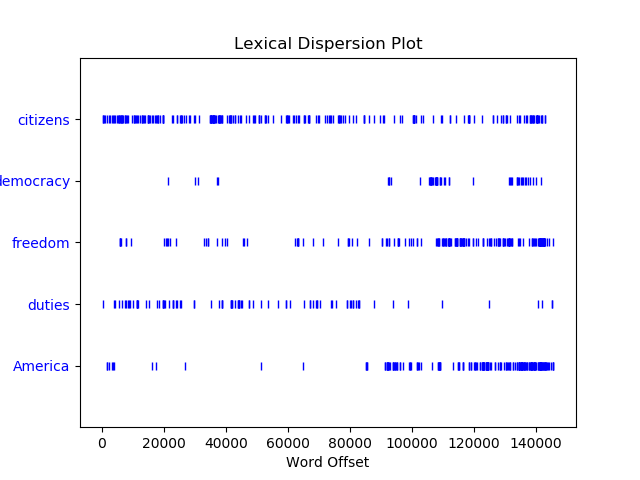

In [27]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

### Lexical Diversity

A measure of the lexical richness of the text: is the ratio of word types to the total number of tokens in a text. It measures how many times a word is used - on average - throughout the text.

### Frequency Distribution

A **frequency distribution** tells us the frequency of each vocabulary item in the text. 

Ref: http://www.nltk.org/api/nltk.html#nltk.probability.FreqDist

In [22]:
fdist = FreqDist(text3)
print(fdist)

<FreqDist with 2789 samples and 44764 outcomes>


---
## Usage Examples

### Counting Vocabulary

In this section we will see how to count the words in a text.

We can find the total number of tokens in a text by using the function `len`.

In [12]:
total_tokens = len(text3)
print("Total tokens in the book of Genesis : ", total_tokens)

Total tokens in the book of Genesis :  44764


This number includes duplicated tokens, i.e. tokens that appears more than once. If we want to known how many distinct tokens are in the text, we can use the function `set`:

In [17]:
unique_tokens = sorted(set(text3))
total_unique_tokens = len(unique_tokens)
print("First 50 unique tokens in the book of Genesis : ", unique_tokens[:50])
print("Total Word Types : ", total_unique_tokens)

First 50 unique tokens in the book of Genesis :  ['!', "'", '(', ')', ',', ',)', '.', '.)', ':', ';', ';)', '?', '?)', 'A', 'Abel', 'Abelmizraim', 'Abidah', 'Abide', 'Abimael', 'Abimelech', 'Abr', 'Abrah', 'Abraham', 'Abram', 'Accad', 'Achbor', 'Adah', 'Adam', 'Adbeel', 'Admah', 'Adullamite', 'After', 'Aholibamah', 'Ahuzzath', 'Ajah', 'Akan', 'All', 'Allonbachuth', 'Almighty', 'Almodad', 'Also', 'Alvah', 'Alvan', 'Am', 'Amal', 'Amalek', 'Amalekites', 'Ammon', 'Amorite', 'Amorites']
Total Word Types :  2789


In [20]:
lexical_diversity = total_unique_tokens / total_tokens
print("Lexical Diversity of the book of Genesis : ", lexical_diversity)
average_word_repetition = 1 / lexical_diversity
print("Each word is repeated an average of", average_word_repetition, "times")

Lexical Diversity of the book of Genesis :  0.06230453042623537
Each word is repeated an average of 16.050197203298673 times


Let's see how the word types are distributed inside the text, i.e. what are the words that appear more in the Book of Genesis?

<FreqDist with 2789 samples and 44764 outcomes>
The 50 most common words in the book of Genesis are :  [(',', 3681), ('and', 2428), ('the', 2411), ('of', 1358), ('.', 1315), ('And', 1250), ('his', 651), ('he', 648), ('to', 611), (';', 605), ('unto', 590), ('in', 588), ('that', 509), ('I', 484), ('said', 476), ('him', 387), ('a', 342), ('my', 325), ('was', 317), ('for', 297), ('it', 290), ('with', 289), ('me', 282), ('thou', 272), ("'", 268), ('is', 267), ('thy', 267), ('s', 263), ('thee', 257), ('be', 254), ('shall', 253), ('they', 249), ('all', 245), (':', 238), ('God', 231), ('them', 230), ('not', 224), ('which', 198), ('father', 198), ('will', 195), ('land', 184), ('Jacob', 179), ('came', 177), ('her', 173), ('LORD', 166), ('were', 163), ('she', 161), ('from', 157), ('Joseph', 157), ('their', 153)]


<IPython.core.display.Javascript object>


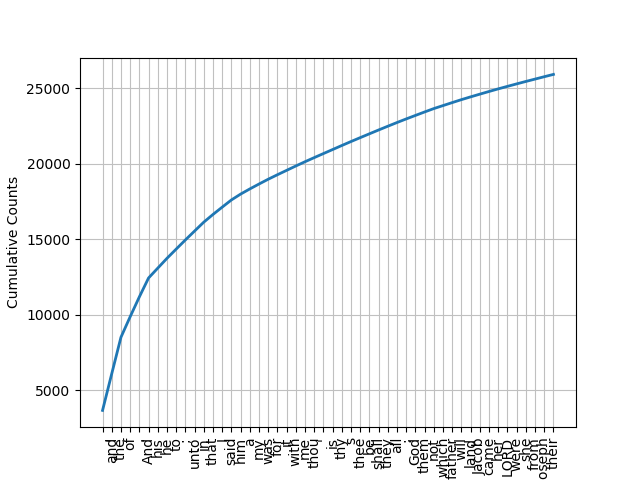

The 50 most common words accounts for 57.88803502814762 % of the total


In [29]:
fdist = FreqDist(text3)
print(fdist)
print("The 50 most common words in the book of Genesis are : ", fdist.most_common(50))
fdist.plot(50, cumulative=True)
cumulative_count = 0
for word in fdist.most_common(50):
    cumulative_count = cumulative_count + word[1]
print("The 50 most common words accounts for", 100 * cumulative_count / total_tokens, "% of the total")

What about the hapaxes in the book?

In [37]:
hapaxes = fdist.hapaxes()
print("There are", len(hapaxes), "hapaxes in the Book of Genesis. 20 of them are:", hapaxes[:20])

There are 1195 hapaxes in the Book of Genesis. 20 of them are: ['form', 'void', 'Day', 'Night', 'firmame', 'Heaven', 'appe', 'Earth', 'signs', 'seasons', 'lesser', 'nig', 'darkne', 'fly', 'whales', 'winged', 'seas', 'likene', 'subdue', 'finished']


Let's see if we can find words that can characterize a text, since neither the most common nor the hapaxes seems to help in this task. Let's search for long words that appears often in the text. What does *long* and *often* mean here? Well, for example, more than average.

In [55]:
total_chars = 0
for w in fdist:
    total_chars = total_chars + (len(w) * fdist[w])
average_chars_per_word = total_chars / total_tokens
print("The average word length is:", average_chars_per_word)
print("Each word appears", average_word_repetition, "on average")
long_words = [w for w in fdist if len(w) > average_chars_per_word and fdist[w] > average_word_repetition]
print("There are", len(long_words), "words over the average:", long_words)

The average word length is: 3.5129791796979717
Each word appears 16.050197203298673 on average
There are 203 words over the average: ['heaven', 'earth', 'upon', 'face', 'waters', 'said', 'there', 'that', 'good', 'from', 'called', 'morning', 'were', 'made', 'which', 'under', 'unto', 'place', 'land', 'bring', 'forth', 'seed', 'tree', 'after', 'brought', 'night', 'them', 'days', 'give', 'great', 'also', 'over', 'hath', 'life', 'every', 'their', 'blessed', 'saying', 'multiply', 'cattle', 'thing', 'beast', 'make', 'have', 'Behold', 'given', 'shall', 'behold', 'very', 'because', 'These', 'when', 'they', 'LORD', 'field', 'before', 'ground', 'went', 'into', 'whom', 'sight', 'food', 'water', 'thence', 'name', 'where', 'same', 'toward', 'took', 'commanded', 'thou', 'shalt', 'should', 'will', 'Adam', 'what', 'gave', 'found', 'flesh', 'taken', 'woman', 'This', 'father', 'mother', 'wife', 'both', 'more', 'know', 'then', 'your', 'eyes', 'with', 'knew', 'heard', 'voice', 'told', 'thee', 'What', 'this

To Read - Chapter 1 : section 3.3